In [1]:
import pandas as pd

breadbasket = pd.read_csv('data/breadbasket_dms.csv')
breadbasket.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [2]:
breadbasket['DateTime'] = pd.to_datetime(breadbasket.Date + ' ' + breadbasket.Time)

In [3]:
prods = breadbasket.Item.unique()
print(prods)
print(len(prods))

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich'

In [4]:
breadbasket.Item.value_counts().head()


Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Item, dtype: int64

In [5]:
groups = {
    "beverage":['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    "kids":["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    "snacks":['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    "bread":['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    "breakfast_pastry":['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    "dessert":['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    "condiments":['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    "breakfast":['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    "lunch":['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

In [6]:
import numpy as np


def chooseCat(prod):
    for categoryName, items in groups.items():
        if prod in items:
            return categoryName
    return "OTHERS"

breadbasket["category"] = breadbasket.Item.apply(chooseCat)

In [7]:
breadbasket.head()

,Date,Time,Transaction,Item,DateTime,category
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,bread
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,bread
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,bread
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,beverage
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,condiments


In [9]:
breadbasket.category.value_counts()


beverage            8263
bread               4126
dessert             2801
breakfast_pastry    2169
OTHERS              2122
lunch               1336
condiments           220
breakfast            160
snacks                49
kids                  47
Name: category, dtype: int64

In [10]:
breadbasket = pd.get_dummies(breadbasket,columns=["category"],prefix="",prefix_sep="")


In [11]:
breadbasket

,Date,Time,Transaction,Item,DateTime,OTHERS,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,1,0,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,1,0,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,1,0,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,0,1,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,2017-04-09 14:32:58,0,1,0,0,0,0,0,0,0,0
21289,2017-04-09,14:32:58,9682,Tea,2017-04-09 14:32:58,0,1,0,0,0,0,0,0,0,0
21290,2017-04-09,14:57:06,9683,Coffee,2017-04-09 14:57:06,0,1,0,0,0,0,0,0,0,0
21291,2017-04-09,14:57:06,9683,Pastry,2017-04-09 14:57:06,0,0,0,0,1,0,0,0,0,0


In [31]:
brgroup1 = breadbasket.groupby(["DateTime","Transaction"]).agg({"Item": lambda x: list(x)})
brgroup1 = brgroup1.reset_index(level=["DateTime"])

In [32]:
brgroup2 = breadbasket.groupby(['Transaction','DateTime']).sum()


In [33]:
display(brgroup1)
display(brgroup2)

,DateTime,Item
Transaction,,
1,2016-10-30 09:58:11,[Bread]
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]"
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]"
4,2016-10-30 10:08:41,[Muffin]
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]"
...,...,...
9680,2017-04-09 14:24:03,[Bread]
9681,2017-04-09 14:30:09,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9682,2017-04-09 14:32:58,"[Muffin, Tacos/Fajita, Coffee, Tea]"


,,OTHERS,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks
Transaction,DateTime,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,1,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,2,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,0,1,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,1,0,0,0,0,0,0,0
9681,2017-04-09 14:30:09,2,1,0,0,0,0,1,0,0,0
9682,2017-04-09 14:32:58,1,2,0,0,1,0,0,0,0,0


In [19]:
brgroup2 = brgroup2.reset_index(level=["DateTime"])

In [21]:
brgroup2["hour"] = brgroup2.DateTime.dt.hour
brgroup2["day"] = brgroup2.DateTime.dt.dayofweek

In [22]:
brgroup2

,DateTime,OTHERS,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day
Transaction,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,1,0,0,0,0,0,0,0,9,6
2,2016-10-30 10:05:34,0,0,2,0,0,0,0,0,0,0,10,6
3,2016-10-30 10:07:57,0,1,0,0,0,1,1,0,0,0,10,6
4,2016-10-30 10:08:41,0,0,0,0,1,0,0,0,0,0,10,6
5,2016-10-30 10:13:03,0,1,1,0,1,0,0,0,0,0,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,1,0,0,0,0,0,0,0,14,6
9681,2017-04-09 14:30:09,2,1,0,0,0,0,1,0,0,0,14,6
9682,2017-04-09 14:32:58,1,2,0,0,1,0,0,0,0,0,14,6


In [23]:
X = brgroup2.drop(columns=["DateTime"])

In [24]:
X

,OTHERS,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day
Transaction,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,9,6
2,0,0,2,0,0,0,0,0,0,0,10,6
3,0,1,0,0,0,1,1,0,0,0,10,6
4,0,0,0,0,1,0,0,0,0,0,10,6
5,0,1,1,0,1,0,0,0,0,0,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,1,0,0,0,0,0,0,0,14,6
9681,2,1,0,0,0,0,1,0,0,0,14,6
9682,1,2,0,0,1,0,0,0,0,0,14,6


In [44]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)

labels = model.fit_predict(X)

In [63]:
results = X.copy()
results["datetime"] = brgroup1.DateTime
results["label"] = labels
results["items"] = brgroup1.Item
#results["weekday"] = brgroup1.DateTime.dt.day_name()

In [64]:
results.head()

,OTHERS,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day,datetime,label,items
Transaction,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,9,6,2016-10-30 09:58:11,4,[Bread]
2,0,0,2,0,0,0,0,0,0,0,10,6,2016-10-30 10:05:34,4,"[Scandinavian, Scandinavian]"
3,0,1,0,0,0,1,1,0,0,0,10,6,2016-10-30 10:07:57,4,"[Hot chocolate, Jam, Cookies]"
4,0,0,0,0,1,0,0,0,0,0,10,6,2016-10-30 10:08:41,4,[Muffin]
5,0,1,1,0,1,0,0,0,0,0,10,6,2016-10-30 10:13:03,4,"[Coffee, Pastry, Bread]"


In [52]:
results.label.value_counts()

4    1926
2    1648
1    1359
6    1245
0    1208
3    1171
5     974
Name: label, dtype: int64

# Analisis de clusters por hora

In [48]:
analysis1 = pd.crosstab(results.hour,[results.label])
analysis1

label,0,1,2,3,4,5,6
hour,,,,,,,
1,0,0,0,0,1,0,0
7,0,0,0,14,2,0,0
8,0,0,0,202,173,0,0
9,0,0,0,512,495,0,0
10,150,0,0,443,674,0,0
11,544,0,0,0,581,0,320
12,363,0,484,0,0,0,500
13,151,0,587,0,0,0,425
14,0,553,577,0,0,0,0


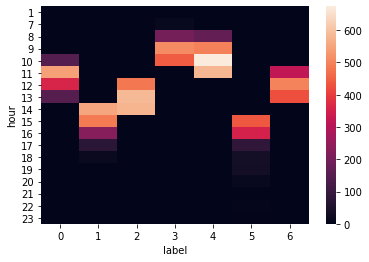

In [49]:
%matplotlib inline
import seaborn as sns
sns.heatmap(analysis1)

# Analisis de clusters por dia de la semana

In [81]:
import calendar
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

analysis2 = pd.crosstab(results.day,results.label, normalize="columns")
analysis2.index = list(calendar.day_name)

In [82]:
analysis2

label,0,1,2,3,4,5,6
lunes,0.000000,0.254599,0.000000,0.279249,0.000000,0.000000,0.371084
martes,0.000000,0.266372,0.000000,0.277541,0.000000,0.002053,0.412851
miércoles,0.134934,0.272995,0.000000,0.269855,0.000000,0.002053,0.216064
jueves,0.539735,0.206034,0.000000,0.173356,0.000000,0.120123,0.000000
viernes,0.325331,0.000000,0.217233,0.000000,0.243510,0.275154,0.000000
sábado,0.000000,0.000000,0.441141,0.000000,0.481308,0.425051,0.000000
domingo,0.000000,0.000000,0.341626,0.000000,0.275182,0.175565,0.000000


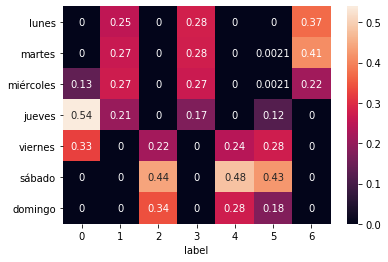

In [83]:
sns.heatmap(analysis2, annot=True)


# Productos top en cada cluster

In [99]:
#a = edata.groupby(['label']).Item.value_counts()
#b = a.to_frame("counts").reset_index().set_index("Item")
#b.groupby('label').counts.nlargest(5)

edata = results.explode('items')
a = edata.groupby("label").items.value_counts()


b = a.to_frame("counts").reset_index().set_index("items")

b.groupby('label').counts.nlargest(5)

label  items        
0      Coffee            666
       Bread             447
       Tea               164
       Sandwich          117
       Cake              108
1      Coffee            754
       Bread             429
       Tea               301
       Cake              230
       Sandwich          134
2      Coffee            935
       Bread             547
       Tea               261
       Sandwich          248
       NONE              210
3      Coffee            741
       Bread             431
       Pastry            211
       Tea               126
       Medialuna          95
4      Coffee           1193
       Bread             807
       Pastry            277
       Medialuna         246
       Tea               185
5      Coffee            482
       Bread             298
       Tea               203
       Cake              180
       Hot chocolate     100
6      Coffee            700
       Bread             366
       Tea               195
       Sandwich       

# Metrics

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x11e9dd890>,
                 k=None, metric=None, model=None, timings=False)

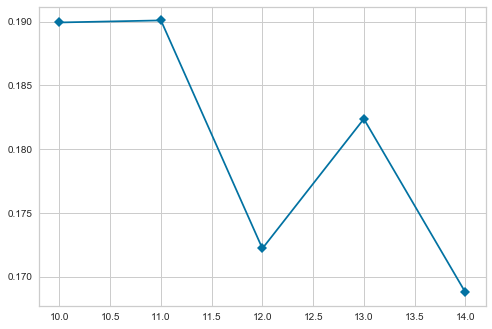

In [111]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,15), metric="silhouette", timings=False)

visualizer.fit(X)        # Fit the data to the visualizer